<a href="https://colab.research.google.com/github/sid781/Logistic-Regression---Loan-Dataset-1/blob/master/Loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
data = pd.read_csv("Loan.csv")

In [ ]:
df = data.copy()

In [ ]:
df = df.drop(['Loan_ID'], axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Numerical columns

In [ ]:
num = df.select_dtypes(exclude=['object']).columns
df[num].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [ ]:
term = df[num].iloc[:,-2:].columns
income=df[num].iloc[:,:-2].columns

Categorical columns

In [ ]:
cat = df.select_dtypes(include=['object']).columns
df[cat].head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


Missing Values

In [ ]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#help(SimpleImputer())

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean', verbose = 0)
imputer = imputer.fit(df[num])
df[num] = imputer.transform(df[num])

In [ ]:
#help(df.dropna)
df.dropna(axis=0, how='any', subset=cat, inplace=True)

In [ ]:
data.shape, df.shape

((614, 13), (554, 12))

Visualisation

In [ ]:
[df[i].unique() for i in df[cat].columns]

[array(['Male', 'Female'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['0', '1', '2', '3+'], dtype=object),
 array(['Graduate', 'Not Graduate'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Urban', 'Rural', 'Semiurban'], dtype=object),
 array(['Y', 'N'], dtype=object)]

In [ ]:
df['Loan_Status'].value_counts()

Y    382
N    172
Name: Loan_Status, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 60.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 34.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 56.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 38.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.4% of the points cannot be placed; y

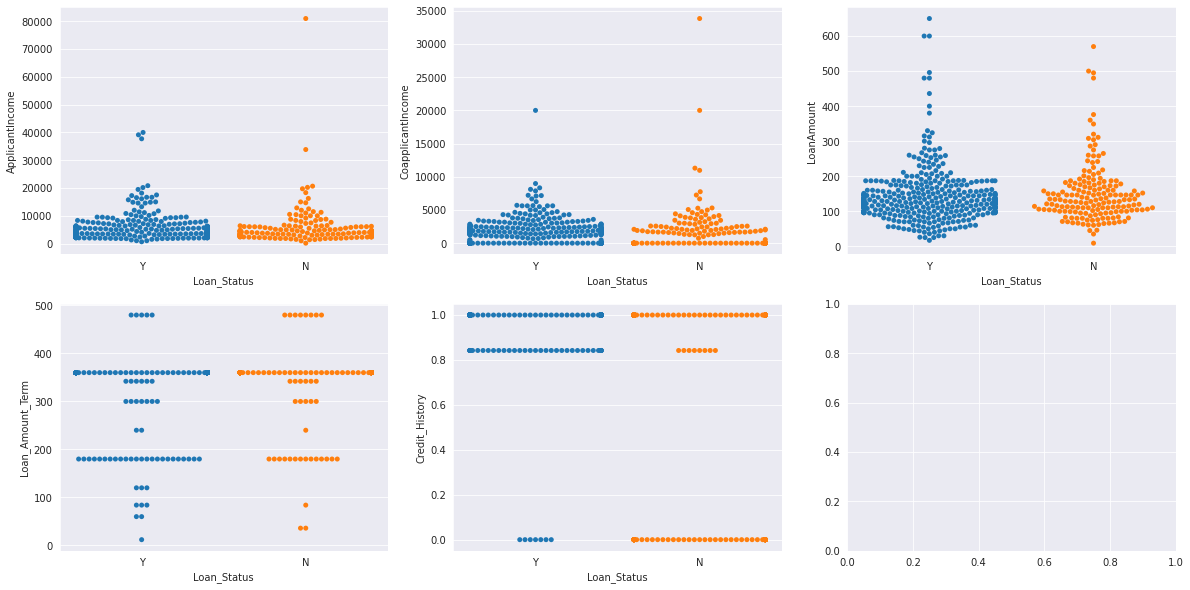

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(20,10))
ax=[ax1, ax2, ax3, ax4, ax5]
for i, num_col in enumerate(df[num].columns):
  sns.swarmplot(x=df['Loan_Status'], y=df[num_col], ax=ax[i])

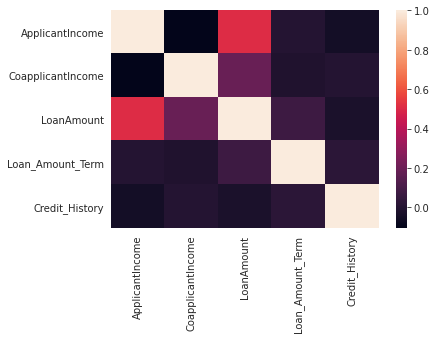

In [ ]:
sns.heatmap(df[num].corr())

Variable Seperation

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

In [ ]:
X[:5]

array([['Male', 'No', '0', 'Graduate', 'No', 5849.0, 0.0,
        146.41216216216216, 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '1', 'Graduate', 'No', 4583.0, 1508.0, 128.0,
        360.0, 1.0, 'Rural'],
       ['Male', 'Yes', '0', 'Graduate', 'Yes', 3000.0, 0.0, 66.0, 360.0,
        1.0, 'Urban'],
       ['Male', 'Yes', '0', 'Not Graduate', 'No', 2583.0, 2358.0, 120.0,
        360.0, 1.0, 'Urban'],
       ['Male', 'No', '0', 'Graduate', 'No', 6000.0, 0.0, 141.0, 360.0,
        1.0, 'Urban']], dtype=object)

In [ ]:
y[:5]

array(['Y', 'N', 'Y', 'Y', 'Y'], dtype=object)

Encoding of variables

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

label = LabelEncoder()
onehot = OneHotEncoder()

y = label.fit_transform(y)

In [ ]:
y[:5]

array([1, 0, 1, 1, 1])

In [ ]:
#help(OneHotEncoder)
ct = ColumnTransformer([('encoder', onehot, [0, 1, 2, 3, 4, 10])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
X.shape

(554, 20)

In [ ]:
X[:5]

array([[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0,
        0.0, 1.0, 5849.0, 0.0, 146.41216216216216, 360.0, 1.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0,
        0.0, 0.0, 4583.0, 1508.0, 128.0, 360.0, 1.0],
       [0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0,
        0.0, 1.0, 3000.0, 0.0, 66.0, 360.0, 1.0],
       [0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0,
        0.0, 1.0, 2583.0, 2358.0, 120.0, 360.0, 1.0],
       [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0,
        0.0, 1.0, 6000.0, 0.0, 141.0, 360.0, 1.0]], dtype=object)

Splitting into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape

(443, 20)

In [ ]:
X_test.shape

(111, 20)

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[-5:] = sc.fit_transform(X_train[-5:])
X_test[-5:] = sc.transform(X_test[-5:])

Training

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state=0)
classifier1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.svm import SVC
#help(SVC)
classifier2 = SVC(kernel='rbf', random_state=0)
classifier2.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#help(DecisionTreeClassifier)
classifier3 = DecisionTreeClassifier(random_state=0)
classifier3.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Prediction

In [ ]:
y_pred1 = classifier1.predict(X_test)

In [ ]:
y_pred2 = classifier2.predict(X_test)

In [ ]:
y_pred3 = classifier3.predict(X_test)

Scoring Performance

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
confusion_matrix(y_test, y_pred1)

array([[14, 17],
       [ 6, 74]])

In [ ]:
confusion_matrix(y_test, y_pred2)

array([[ 0, 31],
       [ 0, 80]])

In [ ]:
confusion_matrix(y_test, y_pred3)

array([[14, 17],
       [21, 59]])

In [ ]:
accuracy_score(y_test, y_pred1)

0.7927927927927928

In [ ]:
accuracy_score(y_test, y_pred2)

0.7207207207207207

In [ ]:
accuracy_score(y_test, y_pred3)

0.6576576576576577

Best Model

In [ ]:
from sklearn.metrics import f1_score
#help(f1_score)
f1_score(y_test, y_pred1)

0.8654970760233918

In [ ]:
f1_score(y_test, y_pred2)

0.837696335078534

In [ ]:
f1_score(y_test, y_pred3)

0.7564102564102564